Александр, привет! Меня зовут Ирина Литвинова. Сегодня я проверю твой проект.<br>
<br> Ты можешь обращаться ко мне на "ты"😏 Надеюсь, ты не будешь против, если и я буду обращаться к тебе на "ты". Но если для тебя это неприемлeмо, дай знать, пожалуйста) <br>
<br> Мне очень важна твоя реакция на мои комментарии, особенно <font color='red'>красные</font>. Можешь реагировать, например, так ('исправлено', ...)<br>
<br> Ты можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. <br>
Это нужно, чтобы не создавалась путаница😉<br>
Например, так:<br>
    
<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
<b>Изменения:</b> Были внесены следующие изменения ...<br></div> 


<br> Пожалуйста, не удаляй мои комментарии, так как они повышают качество повторного ревью и делают его быстрее)<br>
<br> Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓<br>

Для твоего удобства мои комментарии будут в <font color='green'>зеленой</font>, <font color='orange'>желтой</font> или <font color='red'>красной</font> рамках:<br>
<br>

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<b>Ошибка:</b><br>
Если требуются исправления. Работа не может быть принята с красными комментариями.<br></div>

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера</b>
    
<b>Совет:</b><br>
Если можно немного улучшить.<br></div>

<div class="alert alert-block alert-success"><b>Комментарий ревьюера</b>
    
<b>Успех:</b><br>
Если все сделано отлично.<br></div>   

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<div class="alert alert-block alert-success"><b>Комментарий ревьюера</b>
    
<b>Успех:</b><br>
👍 Есть введение в проект. Отлично!<br>

</div> 

## Импорты

In [2]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 Здорово, что импортируешь необходимые библиотеки в первой ячейке. Так сразу понятно какие используются библиотеки и можно легко настроить свое окружение при необходимости. 
</div> 

## Загрузка и подготовка данных

In [1]:
files = os.listdir('datasets')

FileNotFoundError: FileNotFoundError: [Errno 2] No such file or directory: 'datasets'

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<b>Ошибка:</b><br>
Александр, пожалуйста, перед отправкой проекта проверяй работоспособность кода - это можно сделать, нажав на панели Jupiter Hub 👉 **Kernel** 👉  **Restart & Run All** .<br> 
Потом обязательно сохрани. Для этого сделай так: 👉  **File**  👉   **Save and Checkpoint** .   
Когда сохранишь, пожалуйста, проверь - обрати внимание на сообщение "**Последняя контрольная точка: несколько секунд назад
(автосохранение)**" <br>  
</div>

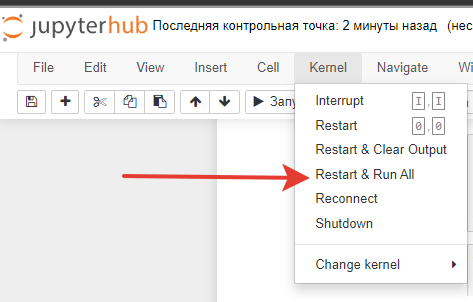

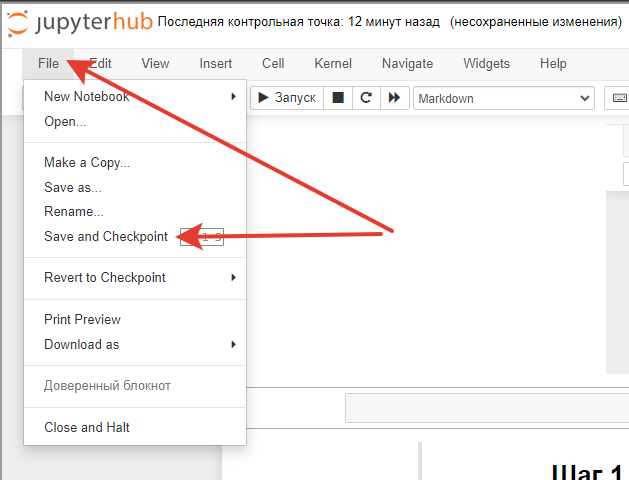

Т.к. в процессе работы нам придеться проделывать одни и теже действия с тремя наборами данных (три региона). Постараемся не противоречить принчипу "Don't repeat yourself". Для этого надо или облорачивть повторяющиеся действия в функции или повторять их с помощью цикла. Я буду делать и то и другое, но больше пользоваться циклами.<br><br>
А что бы не плодить большое количество переменных, содержащих рабочие объекты, будем складывать всё в одинн словарь.<br><br>
Ключами словаря будут номера регионов, а одинаковые сущьности буду содержать одинаковые ключи (переменные). Это должнно упростить работу. <br>
Возможно, это усложнит чтение кода, но чуствую – так будет правильнее. Заодно, поупражняюсь в работе со словарями.<br><br>

Создадим словарь. Ключами будут номера регионов, значения будут также словарям. В "переменную" data загрузим исходные данные каждого региона:

In [ ]:
geos = {}
for i in range(0, len(files)):
    geos[f'{i}'] = {'data':pd.read_csv(f'datasets/geo_data_{i}.csv')}

Посмотрим, что получилось:

In [ ]:
geos

Получилось всё как я хотел : )

In [ ]:
geos['0']['data'].head(3)

На всякий случай, проверим дванные на наличие дубликатов:

In [ ]:
for geo_name, geo in geos.items():
    print(f"geo_data_{geo_name} содержит {geo['data'].duplicated().sum()} дубликатов")

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера</b>
    
<b>Совет:</b><br>
Александр,     
* Чтобы лучше узнать данные, можно проверить дубликаты по `id`    
* Посмотреть распределение признаков и целевой переменной для каждого региона, т.е. построить гистограмму.    
* Еще важно уделять внимание мультиколлинеарности признаков в линейных моделях.<br>
Мультиколлинеарность — явление, при котором наблюдается сильная корреляция между признаками, что может негативно отразиться на модели.<br>

Рекомендую посмотреть отрывок из курса Статистики - ["Корреляция и регрессия".](https://stepik.org/lesson/8086/step/1?unit=1365) <br>
Для удобной визуализации можно использовать - ["Тепловая карта корреляции".](https://www.delftstack.com/ru/howto/seaborn/correlation-heatplot-seaborn-python/) <br>
</div>

Для  разбивки признаков на обычные и целивые используем функцию из предыдущего проекта. Немного доработаем её,что бы она так же уберала не нужные для работы столбцы

In [ ]:
def split_sample(sample, drop_columns, target_column):
    return sample.drop(drop_columns, axis=1), sample[target_column]

В следующем шаге в цикле для всех тёх регионов совершим следующие действия:<br> 
<ol>
    <li>Разобъём данные на обучающую и валидационную выборки в соотношении 75:25</li>
    <li>Применим к полусенным выборкам описанную выше функцию для разделения признаков</li>
    <li>Проведем стандартизацию данных методом MinMaxScaler</li>
</ol><br>
Полученные объекты будем сохранять в соответствуеющие разделы словаря:

In [ ]:
scaler = MinMaxScaler()

for geo in geos.values():
    # Деление выборки на обучающую и авлидационную
    # В каждой итерации переменнные перезапишутся
    train, valid = train_test_split(geo['data'], test_size=0.75, random_state=12345) 
    # Выделим из полученных выборок обучающие признаки и целевой.
    # Сразу "складируем" их в нужные места:
    geo['samples'] = {
        'train':{'feature':split_sample(train, ['id', 'product'], 'product')[0],
                 'target': split_sample(train, ['id', 'product'], 'product')[1]
        },
        'valid':{'feature':split_sample(valid, ['id', 'product'], 'product')[0],
                 'target': split_sample(valid, ['id', 'product'], 'product')[1]
        },
        # Для прогнозирования объёма запасов скажин (только feature)
        'all':split_sample(geo['data'], ['id', 'product'], 'product')[0] 
    }
    
    # Подготовим scaler для стандартизации:
    scaler.fit(geo['samples']['train']['feature'])
    # Проведем стандатизацию перезаписав признаки:
    geo['samples']['train']['feature'] = scaler.transform(geo['samples']['train']['feature'])
    geo['samples']['valid']['feature'] = scaler.transform(geo['samples']['valid']['feature'])

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<b>Ошибка:</b><br>
Саша, надо разбить данные на обучающую и валидационную выборки в соотношении 75:25, т.е. валид.выборка - 25%. Поэтому `test_size` должен быть равен `0.25`
</div>

## Обучение и проверка модели

В следующем шаге в цикле для всех тёх регионов совершим следующие действия:<br> 
<ol>
    <li>Обучим три модели на данных каждого региона отдельно</li>
    <li>Сделаем предсказания на валидационных выборках регионов</li>
    <li>Сохраним предсказаения для каждого региона в соответствующих разделах словаря</li>
    <li>Расчитаем и сохраним MSE каждой модели</li>
    <li>Выведим на экран средний запас предсказанного сырья и RMSE моделей.</li>
</ol><br>

In [ ]:
for geo_name, geo in geos.items():
    # Обучение модели 
    geo['model'] = LinearRegression()
    geo['model'].fit(geo['samples']['train']['feature'], geo['samples']['train']['target'])
    # Проверка
    geo['predictions'] = geo['model'].predict(geo['samples']['valid']['feature'])
    geo['mse'] = mean_squared_error(geo['samples']['valid']['target'], geo['predictions'])
    
    print(f"""Регион {geo_name}:
    Средний запас предсказанного сырья {geo['predictions'].mean()}
    MSE модели региона {geo['mse']**0.5}""")
    print()

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера</b>
    
<b>Совет:</b><br>
Чем больше ошибка (RMSE), тем сильнее ошибается модель в предсказаниях. <br>  
Здесь стоит обратить внимание на размер ошибки, в двух регионах она катастрофически большая - почти 40% от  среднего запаса. И только в одном регионе она минимальная. Если посмотреть корреляцию между признаками и целевой переменной, можно понять почему в одном из регионов ошибка значительно меньше:)<br>
<br>    
Т.к. средний запас в каждом регионе ниже объема безубыточности и при выборе скважин опираемся на предсказания, то качество предсказания имеет огромное значение - важно определить скважины с максимальным запасом.   
    
</div>  

## Подготовка к расчёту прибыли

Все ключевые значения для расчётов сохраним в отдельных переменных.<br> 
Для дальнейшего использования переведем все денежные значения к измерению в тысяах, а соответствующим переменным добваим суффикс "_ths" (thousands)

In [ ]:
region_budget_mlr = 10 # Бюджет на разработку скважин в регионе в миллиарадах
product_price_ths = 450 # Доход с каждой единицы продукта в тысячах (thousands)

# Переведём бюджет на разработку в тысячи:
region_budget_ths = 10 * 1000000000 / 1000 # thousands

# Минимально допустимая вероятность убытков
min_loss_prob = 0.025

# по условию задачи в каждом регионе будут разрабаотывать 200 лучших скажин
# сохраним это число:
n_top = 200

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера</b>
    
<b>Совет:</b><br>
* Согласно руководству по написанию кода на Python [PEP-8](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29) названия констант принято задавать заглавными буквами, например, `BUDGET`. А еще важно объявлять их в начале проекта после импортов, затем загрузка данных. Так проще будет их найти и изменить, если возникнет такая необходимость.
* Для записи больших чисел и более удобного чтения, чтобы не запутаться в нулях, можно использовать такую запись: `10_000_000_000` или `10e9`, что означает 10 * 10**9.    
</div>

In [ ]:
region_budget_ths

Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины:

In [ ]:
breakeven_volume = region_budget_ths / (n_top * product_price_ths)

Что бы разработка скважены не была убыточной, запас сырье вней должен быть не меньше чем:

In [ ]:
 print("{:.2f} тыс.ед.".format(breakeven_volume))

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 Достаточный объём сырья для безубыточной разработки новой скважины рассчитан верно.
</div>

Сравним полученный объём сырья со средним запасом в каждом регионе:

In [ ]:
for geo_name, geo in geos.items():
    diff = geo['predictions'].mean() - breakeven_volume
    if diff < 0:
        print(f"В регионе № {geo_name} разработка с большой вероятностью будет убыточна, но надо детально изучить риски.")
    else:
        print(f"В регионе № {geo_name} разработка с большой вероятностью не будет убыточной, но надо детально изучить риски.")

### Вывод:<br>
<u>                       </u>

По предварительным расчетам во всех трёх регионах разработка, с большой вероятностью будет убыточной.<br>
Но надо просчитать риски статистически

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера</b>
    
<b>Совет:</b><br>
Корректнее объём сырья для безубыточной разработки скважины сравнивать со средним реальным запасом продукта во всем регионе, а не с предсказанными значениями) Но результаты будут совпадать:)
</div>

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b><br>
    
В каждом регионе средний объем сырья меньше достаточного объёма для безубыточности и при выборе скважин опираемся на предсказания, поэтому точность прогноза имеет большое значение и без модели нам не обойтись.  <br>   

Есть 25 000 точек, из которых в результате надо выбрать 200. В результате,  среди этих скважин могут быть скважины с достаточным и недостаточным запасом сырья. <br>
    
Имеено техника "Bootstrap" опираясь на предсказания позволяет оценить риск убытков при случайным отборе 500 точек. 1000 раз отбирая случайным образом точки, считаем какой % случаев принесет убытки. 
    
   
</div>

Выберим скважины с максимальными значениями предсказаний:

## Расчёт прибыли и рисков 

 Написание функции для расчета прибыли:

In [ ]:
def calculat_profit_ths(predictions, 
                    f_region_budget_ths=region_budget_ths, 
                    f_product_price_ths=product_price_ths, f_n_top=n_top):
                    # Префиск f в параметраф функции, означает, что это параметр функции, 
                    # а не глобальная перменная 
    
    predictions[::-1].sort()
    top = predictions[:f_n_top]

    return (top.sum() * f_product_price_ths) - f_region_budget_ths

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера</b>
    
<b>Совет:</b><br>
Для дальнейших расчетов необходимо использовать предсказания и таргет для валид выборки: `target_valid`, `predictions_valid` для каждого региона (они у тебя уже есть). <br>
    
Можно, например, создать датафрейм с `target_valid`, `predictions_valid` для каждого региона и подавать в `bootstrap`
```python    
data_0= pd.DataFrame(target_valid)   
data_0['предсказания'] = predictions_valid   
```  
Так сделать для каждого региона.    
    
</div>  

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<b>Ошибка:</b><br>
Функцию прибыли надо скорректировать.<br>
* Сортируем датасет по предсказаниям по убыванию
* Оставляем первые 200 реальных значений продукта
* Суммируем получившиеся таргеты, умножаем на цену и отнимаем расходы.      
<br>
Функция может выглядеть так, например:
    
```python 
''' в функцию попадают 500 случайных значений из датасета, к-й содержит предсказания и таргет_валид'''    
def calculat_profit_ths(датасет):
    ''' сортируем по предсказаниям'''
    датасет_sorted = датасет.sort_values(by = 'предсказания', ascending=False)
    ''' берем первые 200 реальных значений продукта'''    
    target_sorted = датасет_sorted['таргет_валид'][:200]
    
    product = target_sorted.sum()
    return product * цена - расходы       
```    
Для цены, расходов и 200 точек надо использовать константы 
</div>

Тестируем функцию:

In [ ]:
calculat_profit_ths(geos['0']['predictions'])

Работает адекватно. И более того, мы видим, что если из числа намеченных скважен разработать 200 лучших, такая разрботка будет прибыльна

In [ ]:
sample_n = 200

for geo_name, geo in geos.items():
    # noinspection PyRedeclaration
    bootstraped_profit_sample = []
    for i in range(1000):
        np.random.shuffle(geo['predictions'])
        predictions_subsample = geo['predictions'][:sample_n]
        bootstraped_profit_sample.append(calculat_profit_ths(predictions_subsample, f_n_top=sample_n))
    bootstraped_profit_sample = pd.Series(bootstraped_profit_sample)
    
    geo['predicted_profit'] = {}
    geo['predicted_profit']['mean']  = bootstraped_profit_sample.mean()
    geo['predicted_profit']['lower'] = bootstraped_profit_sample.quantile(0.025)
    geo['predicted_profit']['upper'] = bootstraped_profit_sample.quantile(0.975)
    geo['predicted_profit']['risk']  = (bootstraped_profit_sample < 0).mean()
    geo['predicted_profit']['top_200'] = calculat_profit_ths(geo['predictions'])

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<b>Ошибка:</b><br>
Применение Bootstrap тоже надо скорректировать)<br>

```python  
...  
bootstraped_profit_sample = [] 
state = np.random.RandomState(12345)    
for i in range(1000):
    ''' нам надо выбрать 500 случайных значений из датасета, к-й содержит предсказания и таргет_валид'''
    data_500 = data_0.sample(500, replace=True, random_state=state)    
    bootstraped_profit_sample.append(функция_прибыли(data_500)) 
''' получили 1000 значений прибыли'''
  
    ...
```    
   
</div>

<div class="alert alert-block alert-success"><b>Комментарий ревьюера</b><br>
    
Напомню почему при семплировании данных лучше устанавливать `replace = True`. Это необходимо чтобы наблюдение в выборку попало несколько раз, что позволяет добиться независимости при каждом выборе, иначе вероятность достать элемент из выборки будет с каждым разом увеличиваться. Чем больше размер подвыборки, тем выраженнее будет зависимость, поэтому без возврата не удастся получить разнообразные варианты, а подвыборку бОльшего размера вообще не получить.

Почему именно так. Вспомним, что выборка - это некоторое представление о генеральной совокупности, ее часть. Значит, что где-то в регионе существуют и другие потенциальные точки добычи нефти, о которых мы можем не знать, но они являются частью этой генеральной совокупности. В этом случае повторяющиеся наблюдения можно считать разными точками добычи из всей генеральной совокупности с близкими характеристиками.
    
</div>  

<div class="alert alert-block alert-success"><b>Комментарий ревьюера</b>
    
<b>Успех:</b><br>
    👍 Расчет средней прибыли `['mean']`, квантилей `['lower']/['upper']` и риска убытков `['risk']` верный!)   
</div>  

In [ ]:
for geo_name, geo in geos.items():
    print(f"Регион № {geo_name}:")
    print(f"Средняя прибыль:{geo['predicted_profit']['mean']:.2f}")
    print(f"Доверительный интервал(95%): {geo['predicted_profit']['lower']:.2f} : {geo['predicted_profit']['upper']:.2f}")
    print(f"Риск разработки: {geo['predicted_profit']['risk'] * 100} %")
    print(f"Расчетная прибыль при разработки 200 лучших скважен: {geo['predicted_profit']['top_200']:.2f}", )
    print()

### Вывод: 

По поим расчетам, вероятность убытка каздого региона при разработке скважын "случаным образом" составляет 100%.
Но при разработке 200 лучших место рожений каждый регион становиться прибыльным, причем наиболее прибыльным выглядит мпервый регион

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<b>Ошибка:</b><br>
Александр, после перерасчетов скорректируй, пожалуйста, итоговый вывод и выбери перспективный регион.
   
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>Общий вывод по проекту</u></b>
<font color='green'><br> 


Александр, приложено много усилий, ты - молодец! Есть несколько важных моментов, которые я отметила и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях. 

**Что мне особенно понравилось в твоей работе:**:
 

* Рассчитан средний запас предсказанного сырья и размер ошибки для каждого региона.
* Рассчитан достаточный объём сырья для безубыточной разработки новой скважины. 
* Есть расчет рисков, прибыли и доверительного интервала.   
* Проект полностью соответствует плану!<br>


**На что стоит обратить внимание**:
    
* Осталось совсем немного поправить, а именно: исправить ошибку в коде, скорректировать разделение на выборки, функцию прибыли, Bootstrap и итоговый вывод. Подсказки ты найдешь в моих комментариях.
* Александр, в проекте ты уделяешь внимание словарям, у тебя неплохо получается работать с ними, но не забывай: код - инструмент, цель - выводы, постарайся формулировать их более развернуто))



**Доработка займет у тебя совсем немного времени) Желаю удачи и жду твой проект на повторное ревью!**😉 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован